<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

There are no critical comments, so your project has been accepted. However, i want to send it back in case you have any questions or if you want to add additional code. 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div class="alert alert-info"> <b>Student comments:</b> 
    
Hi Dmitrii, I made some changes according to your advice to be more efficient, like aggregating info for calls in less code, as well as making the pivot tables in a much more efficient manner. This project was very engaging, thanks very much for the insights.   </div>   

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with additional improvements! 
- Now everything is perfect. No critial issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?


The overall goal of this study is to evaluate the behavior of users between the Surf and Ultimate plans. We have plenty of data, including where the users are from, the number of calls they make, the duration of their calls, the amount of data they use, the number of messages they send, and the timestamps of these occurances. After aggregating and evaluating these parameters, the revenue will be calculated and a final analysis regarding the differences in revenue will be done. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks. Additionally I can advice to remove default comments to keep your project neat and clean. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Plans

In [8]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Print a sample of data for plans
df_plans.head(10)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
df_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [11]:
df_plans.duplicated().sum()

0

The df_plans dataframe only contains 2 rows, but quite informative with 8 columns. This dataframe contains information about the pricing of each of the two internet plans. All data types appear to be appropriate, and there are no missing or duplicated values.

### Fix data

Nothing to fix.

### Enrich data

Nothing to enrich.

## Users

In [12]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Print a sample of data for users

df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [14]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [15]:
df_users.duplicated().sum()

0

The df_users dataframe contains some artifacts that should be addressed. Firstly, it can be useful to change the date columns into datetime objects. Secondly, the majority of the values in the churn_date columns is missing. This could be due to the fact that there is no churn date for the user. These can be replaced with a placeholder name.

### Fix Data

In [16]:
df_users['churn_date'] = df_users['churn_date'].fillna('Active')
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,Active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,Active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,Active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,Active


### Enrich Data

In [17]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format = '%Y-%m-%d')
df_users['reg_date'].head(10)

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
5   2018-11-29
6   2018-11-27
7   2018-07-11
8   2018-08-03
9   2018-04-22
Name: reg_date, dtype: datetime64[ns]

In [18]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d',errors = 'ignore')
df_users['churn_date'].head(10)

0        Active
1        Active
2        Active
3        Active
4        Active
5        Active
6    2018-12-18
7        Active
8        Active
9        Active
Name: churn_date, dtype: object

## Calls

In [19]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Print a sample of data for calls
df_calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [21]:
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [22]:
df_calls.duplicated().sum()

0

The df_calls dataframe appears to have no missing or duplicate values. The call_date column can be changed to datetime, and the data can be enriched with a column of rounded duration values, since this is how Megaline evaluates calls.

### Fix data

Nothing to fix.

### Enrich data

In [23]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls['call_date'].head(10)

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
5   2018-12-31
6   2018-12-27
7   2018-12-28
8   2018-12-28
9   2018-12-26
Name: call_date, dtype: datetime64[ns]

In [24]:
df_calls['rounded_minutes'] = np.ceil(df_calls['duration'])
df_calls.rounded_minutes.head(10)

0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
5     3.0
6     6.0
7    15.0
8     6.0
9     5.0
Name: rounded_minutes, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding. Also, great choice of np.ceil () method :)


## Messages

In [25]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Print a sample of data for messages
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [27]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [28]:
df_messages.duplicated().sum()

0

The df_messages dataframe is filled properly, and the only appropriate change would be to assign the datetime data type to the message_date column.

### Fix data

Nothing to fix.

### Enrich data

In [29]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['message_date'].head(10)

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
5   2018-12-29
6   2018-12-30
7   2018-12-31
8   2018-12-27
9   2018-12-28
Name: message_date, dtype: datetime64[ns]

## Internet

In [30]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Print a sample of data for the internet traffic
df_internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [32]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [33]:
df_internet.duplicated().sum()

0

The df_internet dataframe has appropriate values. A viable change is once again to assign the datetime data type to the session_date column. Also, since Megaline rounds monthly data usage up to the nearest gigabyte per month, the dataframe will be enriched with that information.

### Fix data

Nothing to fix.

### Enrich data

In [34]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['session_date'].head(10)

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
5   2018-08-24
6   2018-12-09
7   2018-11-04
8   2018-11-27
9   2018-12-13
Name: session_date, dtype: datetime64[ns]

In [35]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

In [36]:
totals_internet = df_internet.groupby(['user_id', 'month'], as_index=False).sum()
totals_internet.head(10)


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


In [37]:
def round_up_thousand(mb_used):
    return np.ceil(mb_used/1000) * 1000

In [38]:
totals_internet['rounded_gb_used'] = totals_internet['mb_used'].apply(round_up_thousand)/1000
totals_internet.head(10)

,user_id,month,mb_used,rounded_gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0
5,1001,12,19369.18,20.0
6,1002,10,6552.01,7.0
7,1002,11,19345.08,20.0
8,1002,12,14396.24,15.0
9,1003,12,27044.14,28.0


In [39]:
totals_internet_dict = totals_internet['rounded_gb_used'].to_dict()
list(totals_internet_dict.items())[:5]

[(0, 2.0), (1, 7.0), (2, 14.0), (3, 23.0), (4, 19.0)]

In [40]:
totals_internet_dict = pd.Series(totals_internet_dict)
totals_internet_dict.head(5)

0     2.0
1     7.0
2    14.0
3    23.0
4    19.0
dtype: float64

## Study plan conditions

In [41]:
# Print out the plan conditions and make sure they are clear for you
print('Surf Plan:')
print('Monthly charge: $20')
print('500 monthly minutes, 50 texts, and 15 GB of data')
print('After exceeding the package limits:')
print('1 minute: 3 cents')
print('1 text message: 3 cents')
print('1 GB of data: $10')
print()
print('Ultimate Plan:')
print('Monthly charge: $70')
print('3000 monthly minutes, 1000 text messages, and 30 GB of data')
print('After exceeding the package limits:')
print('1 minute: 1 cent')
print('1 text message: 1 cent')
print('1 GB of data: $7')


Surf Plan:
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate Plan:
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 

## Aggregate data per user

Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period.

In [42]:
# Calculate the number of calls made by each user per month. Save the result.
# Calculate the amount of minutes spent by each user per month. Save the result.

df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

totals_calls = df_calls.groupby(['user_id','month']).agg(calls_count = ('id', 'count'), 
                                                         minutes_sum = ('rounded_minutes','sum')).reset_index()
totals_calls.head()

,user_id,month,calls_count,minutes_sum
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:
    
    data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
    
or
    
    data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

In [43]:
# Calculate the number of messages sent by each user per month. Save the result.
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month


In [44]:
totals_messages_count = df_messages.groupby(['user_id', 'month'],as_index=False)['id'].count()
totals_messages_count = totals_messages_count.rename(columns = {'id': 'messages'})
totals_messages_count.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [45]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [46]:
totals_internet = df_internet.groupby(['user_id', 'month'],as_index=False).sum()
totals_internet.head(10)


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


In [47]:
def round_up_thousand(mb_used):
    return np.ceil(mb_used/1000) * 1000

In [48]:
totals_internet['rounded_gb_used'] = totals_internet['mb_used'].apply(round_up_thousand)/1000
totals_internet.head()

,user_id,month,mb_used,rounded_gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0


In [49]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

merged_data = totals_internet.merge(totals_calls, on = ['user_id', 'month'], how = 'outer')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2292 non-null   int64  
 1   month            2292 non-null   int64  
 2   mb_used          2277 non-null   float64
 3   rounded_gb_used  2277 non-null   float64
 4   calls_count      2258 non-null   float64
 5   minutes_sum      2258 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.3 KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer'` can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

In [50]:
merged_data = merged_data.merge(totals_messages_count, on = ['user_id', 'month'], how = 'outer')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   mb_used          2277 non-null   float64
 3   rounded_gb_used  2277 non-null   float64
 4   calls_count      2258 non-null   float64
 5   minutes_sum      2258 non-null   float64
 6   messages         1806 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


In [51]:
merged_data = merged_data.drop(columns = 'mb_used')


Dropped unnecessary data.

In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   rounded_gb_used  2277 non-null   float64
 3   calls_count      2258 non-null   float64
 4   minutes_sum      2258 non-null   float64
 5   messages         1806 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 125.4 KB


In [53]:
merged_data.describe()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages
count,2293.000000,2293.000000,2277.000000,2258.000000,2258.000000,1806.000000
mean,1246.075883,9.172700,17.372859,60.998671,435.937555,42.110188
std,143.051927,2.496386,7.869052,31.770869,231.972343,33.122931
min,1000.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1122.000000,8.000000,13.000000,39.000000,275.000000,17.000000
50%,1245.000000,10.000000,17.000000,60.000000,429.000000,34.000000
75%,1368.000000,11.000000,22.000000,80.000000,574.750000,59.000000
max,1499.000000,12.000000,71.000000,205.000000,1510.000000,266.000000


In [54]:
merged_data.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,23.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0


In [55]:
merged_data.sort_values(by = 'user_id').head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,23.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0


In [56]:
# Add the plan information

plans = df_users[['user_id', 'plan']]
plans_dict = plans.set_index('user_id').to_dict()['plan']
list(plans_dict.items())[:5]

[(1000, 'ultimate'),
 (1001, 'surf'),
 (1002, 'surf'),
 (1003, 'surf'),
 (1004, 'surf')]

In [57]:
merged_data

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages
0,1000,12,2.0,16.0,124.0,11.0
1,1001,8,7.0,27.0,182.0,30.0
2,1001,9,14.0,49.0,315.0,44.0
3,1001,10,23.0,65.0,393.0,53.0
4,1001,11,19.0,64.0,426.0,36.0
...,...,...,...,...,...,...
2288,1470,11,NaN,81.0,632.0,156.0
2289,1470,12,NaN,78.0,592.0,153.0
2290,1484,11,NaN,2.0,38.0,1.0
2291,1491,4,NaN,8.0,44.0,6.0


In [58]:
merged_data['plan'] = merged_data['user_id'].map(plans_dict)
merged_data.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan
0,1000,12,2.0,16.0,124.0,11.0,ultimate
1,1001,8,7.0,27.0,182.0,30.0,surf
2,1001,9,14.0,49.0,315.0,44.0,surf
3,1001,10,23.0,65.0,393.0,53.0,surf
4,1001,11,19.0,64.0,426.0,36.0,surf


In [59]:
# Calculate the monthly revenue for each user

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [60]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   rounded_gb_used  2277 non-null   float64
 3   calls_count      2258 non-null   float64
 4   minutes_sum      2258 non-null   float64
 5   messages         1806 non-null   float64
 6   plan             2293 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 143.3+ KB


In [61]:
# messages
merged_data['mess_cost'] = float(0)
for i in range(len(merged_data)):
    messages = merged_data['messages'][i] - df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['messages_included'].item()
    if messages > 0:
        merged_data['mess_cost'][i] = messages * df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['usd_per_message'].item()
    else:
        merged_data['mess_cost'][i] = 0

In [62]:
# data
merged_data['data_cost'] = float(0)
for i in range(len(merged_data)):
    data = (merged_data['rounded_gb_used'][i]) - (df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['mb_per_month_included'].item()/1000)
    if data > 0:
        merged_data['data_cost'][i] = data * df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['usd_per_gb'].item()
    else:
        merged_data['data_cost'][i] = 0

In [63]:
# calls/minutes
merged_data['minutes_cost'] = float(0)
for i in range(len(merged_data)):
    minutes = (merged_data['minutes_sum'][i]) - df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['minutes_included'].item()
    if minutes > 0:
        merged_data['minutes_cost'][i] = minutes * df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['usd_per_minute'].item()
    else:
        merged_data['minutes_cost'][i] = 0

In [64]:
# monthly charge
merged_data['plan_cost'] = float(0)
for i in range(len(merged_data)):
    merged_data['plan_cost'][i] = df_plans.loc[df_plans['plan_name'] == plans_dict[merged_data['user_id'][i]]]['usd_monthly_pay'].item()

In [65]:
merged_data

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.00,0.0,0.00,70.0
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.00,20.0
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.00,20.0
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.00,20.0
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.00,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,11,NaN,81.0,632.0,156.0,surf,3.18,0.0,3.96,20.0
2289,1470,12,NaN,78.0,592.0,153.0,surf,3.09,0.0,2.76,20.0
2290,1484,11,NaN,2.0,38.0,1.0,surf,0.00,0.0,0.00,20.0
2291,1491,4,NaN,8.0,44.0,6.0,surf,0.00,0.0,0.00,20.0


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here! 
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read about it here: [https://www.pythonpool.com/numpy-clip/](https://www.pythonpool.com/numpy-clip/)

    total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']
    


## Study user behaviour

### Calls

In [66]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

calls_info = merged_data[['user_id', 'month','calls_count', 'minutes_sum', 'plan']]
calls_info['avg_dur'] = calls_info['minutes_sum']/calls_info['calls_count']

In [67]:
calls_info.head()

,user_id,month,calls_count,minutes_sum,plan,avg_dur
0,1000,12,16.0,124.0,ultimate,7.750000
1,1001,8,27.0,182.0,surf,6.740741
2,1001,9,49.0,315.0,surf,6.428571
3,1001,10,65.0,393.0,surf,6.046154
4,1001,11,64.0,426.0,surf,6.656250


In [68]:
calls_info = calls_info.dropna()

In [69]:
calls_surf = calls_info.query('plan == "surf"')
calls_surf.head()

,user_id,month,calls_count,minutes_sum,plan,avg_dur
1,1001,8,27.0,182.0,surf,6.740741
2,1001,9,49.0,315.0,surf,6.428571
3,1001,10,65.0,393.0,surf,6.046154
4,1001,11,64.0,426.0,surf,6.656250
5,1001,12,56.0,412.0,surf,7.357143


In [70]:
calls_surf_piv = calls_surf.pivot_table(index= 'month', values= 'avg_dur', aggfunc= ['mean', 'var'])
calls_surf_piv

,mean,var
,avg_dur,avg_dur
month,,
1,6.642857,0.191610
2,6.814628,1.832501
3,7.199957,1.547761
4,7.040349,0.989670
5,7.182627,1.469185
6,7.215501,0.891747
7,7.027745,0.825348
8,7.127926,1.255428


In [71]:
calls_ult = calls_info.query('plan == "ultimate"')
calls_ult.head()

,user_id,month,calls_count,minutes_sum,plan,avg_dur
0,1000,12,16.0,124.0,ultimate,7.750000
19,1006,11,2.0,10.0,ultimate,5.000000
20,1006,12,9.0,59.0,ultimate,6.555556
26,1008,10,71.0,476.0,ultimate,6.704225
27,1008,11,63.0,446.0,ultimate,7.079365


In [72]:
calls_ult_piv = calls_ult.pivot_table(index= 'month', values= 'avg_dur', aggfunc= ['mean', 'var'])
calls_ult_piv

,mean,var
,avg_dur,avg_dur
month,,
1,6.201915,4.228411
2,7.062303,0.419797
3,6.393757,0.662338
4,7.215266,0.704649
5,7.121973,0.435775
6,7.110516,0.708716
7,7.324718,1.077176
8,7.018966,1.063511


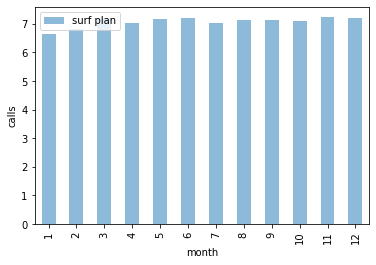

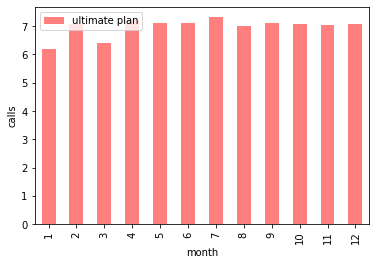

In [73]:
calls_surf_piv['mean'].plot(kind = 'bar', alpha = 0.5).set_ylabel('calls');
plt.legend(['surf plan'])
calls_ult_piv['mean'].plot(kind = 'bar', alpha = 0.5, color = 'red').set_ylabel('calls');
plt.legend(['ultimate plan']);

In [74]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Calculate the mean and the variance of the monthly call duration

minutes_info = merged_data[['user_id','minutes_sum', 'month', 'plan']]
minutes_info.head()

,user_id,minutes_sum,month,plan
0,1000,124.0,12,ultimate
1,1001,182.0,8,surf
2,1001,315.0,9,surf
3,1001,393.0,10,surf
4,1001,426.0,11,surf


In [75]:
minutes_surf = minutes_info.query('plan == "surf"')
minutes_surf.head()

,user_id,minutes_sum,month,plan
1,1001,182.0,8,surf
2,1001,315.0,9,surf
3,1001,393.0,10,surf
4,1001,426.0,11,surf
5,1001,412.0,12,surf


In [76]:
minutes_surf_piv = minutes_surf.pivot_table(index= 'month', values= 'minutes_sum', aggfunc= ['mean', 'var'])
minutes_surf_piv

,mean,var
,minutes_sum,minutes_sum
month,,
1,203.000000,15842.000000
2,297.000000,52226.500000
3,330.000000,35809.363636
4,351.540000,50866.743265
5,410.240000,56938.779459
6,435.791667,44094.061404
7,453.733333,59802.012325
8,417.849057,52122.749224


In [77]:
minutes_ult = minutes_info.query('plan == "ultimate"')
minutes_ult.head()

,user_id,minutes_sum,month,plan
0,1000,124.0,12,ultimate
19,1006,10.0,11,ultimate
20,1006,59.0,12,ultimate
26,1008,476.0,10,ultimate
27,1008,446.0,11,ultimate


In [78]:
minutes_ult_piv = minutes_ult.pivot_table(index= 'month', values= 'minutes_sum', aggfunc= ['mean', 'var'])
minutes_ult_piv

,mean,var
,minutes_sum,minutes_sum
month,,
1,193.500000,16572.333333
2,470.333333,54345.066667
3,304.250000,61984.931818
4,336.857143,34888.928571
5,406.241379,43841.046798
6,387.444444,37902.570707
7,427.067797,72563.374635
8,421.436620,53645.506640


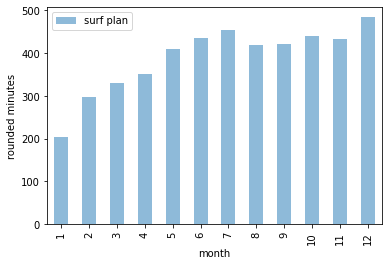

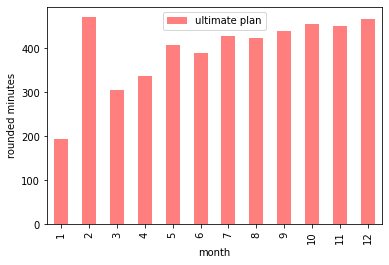

In [79]:
minutes_surf_piv['mean'].plot(kind = 'bar', alpha = 0.5).set_ylabel('rounded minutes');
plt.legend(['surf plan']);
minutes_ult_piv['mean'].plot(kind = 'bar', alpha = 0.5, color = 'red').set_ylabel('rounded minutes');
plt.legend(['ultimate plan']);

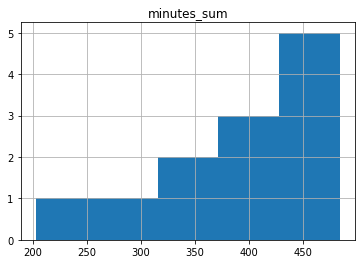

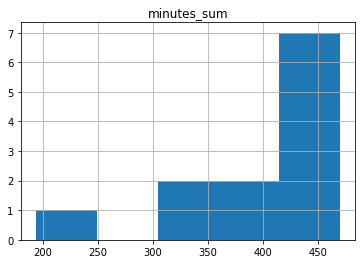

In [80]:
minutes_surf_piv['mean'].hist(bins = 5);
minutes_ult_piv['mean'].hist(bins = 5);

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

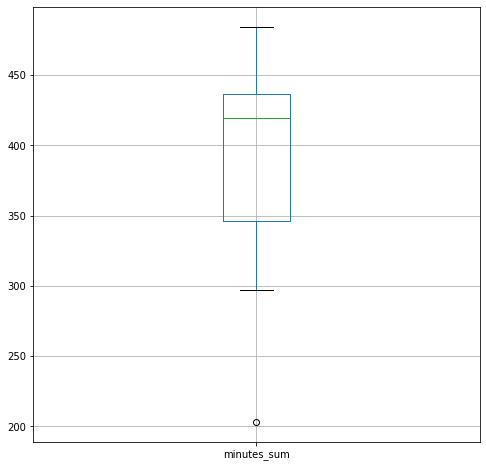

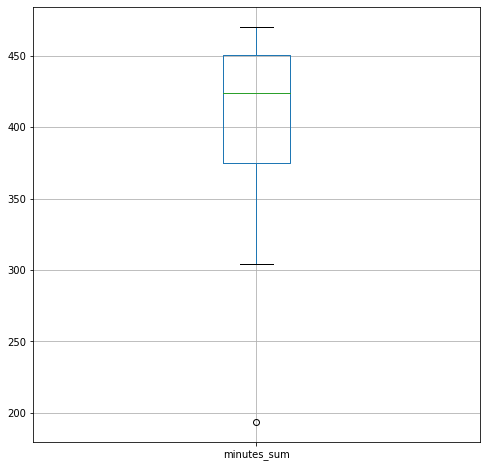

In [81]:
# Plot a boxplot to visualize the distribution of the monthly call duration
minutes_surf_piv['mean'].boxplot(figsize = (8,8));
plt.show()
minutes_ult_piv['mean'].boxplot(figsize = (8,8));
plt.show()

In [82]:
results_minutes = st.ttest_ind(minutes_surf_piv['mean'], minutes_ult_piv['mean'])

alpha = 0.05

print('p-value:', results_minutes.pvalue)

if results_minutes.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.8457529]
We can't reject the null hypothesis


Based on the t-test between the two samples, there is no significant difference between the average duration of calls between users of the surf plan and users of the ultimate plan.

### Messages

In [83]:
# Compare the number of messages users of each plan tend to send each month

messages_info = merged_data[['user_id', 'month','messages', 'plan']]
messages_info = messages_info.dropna()
messages_info.head()

,user_id,month,messages,plan
0,1000,12,11.0,ultimate
1,1001,8,30.0,surf
2,1001,9,44.0,surf
3,1001,10,53.0,surf
4,1001,11,36.0,surf


In [84]:
messages_surf = messages_info.query('plan == "surf"')
messages_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 1 to 2291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   1222 non-null   int64  
 1   month     1222 non-null   int64  
 2   messages  1222 non-null   float64
 3   plan      1222 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 47.7+ KB


In [85]:
messages_surf_piv = messages_surf.pivot_table(index= 'month', values= 'messages', aggfunc= ['mean', 'var'])
messages_surf_piv

,mean,var
,messages,messages
month,,
1,21.000000,NaN
2,21.600000,512.800000
3,21.937500,352.062500
4,24.166667,534.028571
5,33.017857,867.945130
6,33.616438,936.406393
7,35.945055,907.985836
8,37.596774,1013.315762


In [86]:
messages_ult = messages_info.query('plan == "ultimate"')
messages_ult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 2292
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   584 non-null    int64  
 1   month     584 non-null    int64  
 2   messages  584 non-null    float64
 3   plan      584 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 22.8+ KB


In [87]:
messages_ult_piv = messages_ult.pivot_table(index= 'month', values= 'messages', aggfunc= ['mean', 'var'])
messages_ult_piv

,mean,var
,messages,messages
month,,
1,20.666667,310.333333
2,25.166667,465.366667
3,34.714286,613.904762
4,28.937500,512.862500
5,44.333333,1246.933333
6,36.289474,807.238265
7,41.212766,858.084181
8,47.929825,1034.387845


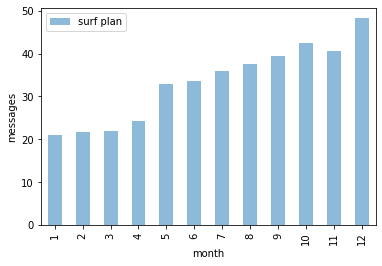

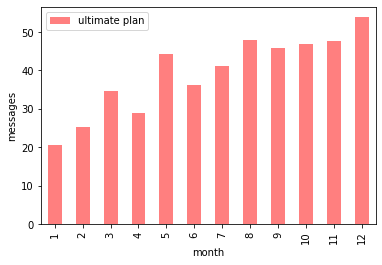

In [88]:
messages_surf_piv['mean'].plot(kind = 'bar', alpha = 0.5).set_ylabel('messages');
plt.legend(['surf plan'])
messages_ult_piv['mean'].plot(kind = 'bar', alpha = 0.5, color = 'red').set_ylabel('messages');
plt.legend(['ultimate plan']);

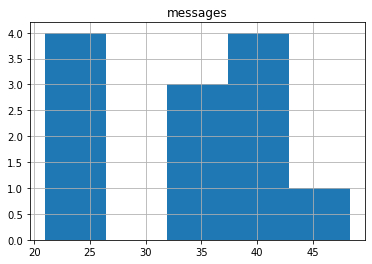

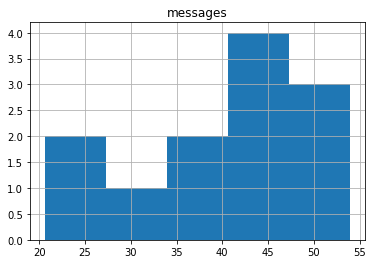

In [89]:
messages_surf_piv['mean'].hist(bins = 5);
messages_ult_piv['mean'].hist(bins = 5);

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
To remove a technical output before the graph you can add either ; or plt.show()

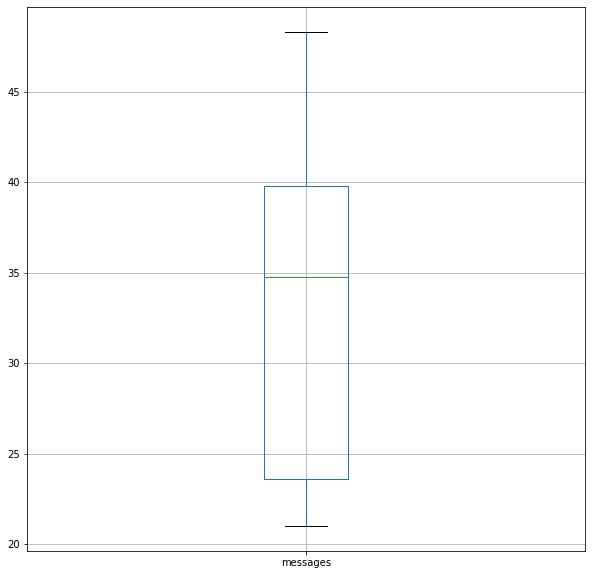

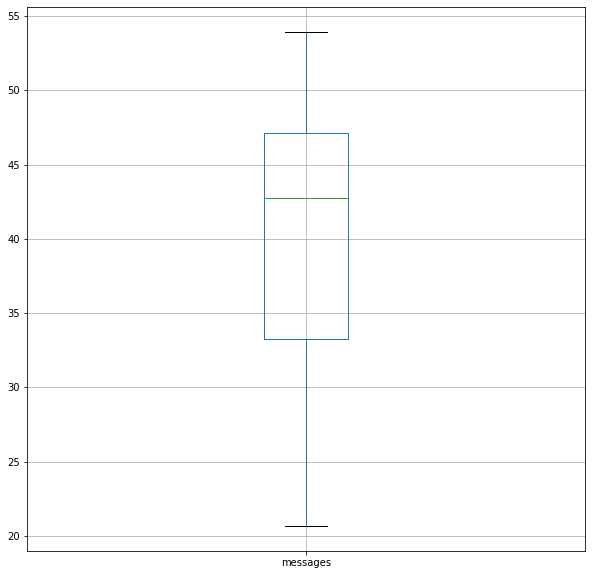

In [90]:
messages_surf_piv['mean'].boxplot(figsize = (10,10));
plt.show()
messages_ult_piv['mean'].boxplot(figsize = (10,10));
plt.show()

In [91]:
results_messages = st.ttest_ind(messages_surf_piv['mean'], messages_ult_piv['mean'])

alpha = 0.05

print('p-value:', results_messages.pvalue)

if results_messages.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.13661247]
We can't reject the null hypothesis


Based on the t-test between the two samples, a significant difference between the amount of messages per month between users of the surf plan and users of the ultimate plan was found. 

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
This is a great case to create one function to automate your code.

### Internet

In [92]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   rounded_gb_used  2277 non-null   float64
 3   calls_count      2258 non-null   float64
 4   minutes_sum      2258 non-null   float64
 5   messages         1806 non-null   float64
 6   plan             2293 non-null   object 
 7   mess_cost        2293 non-null   float64
 8   data_cost        2293 non-null   float64
 9   minutes_cost     2293 non-null   float64
 10  plan_cost        2293 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 279.5+ KB


In [93]:
# Compare the amount of internet traffic consumed by users per plan

internet_info = merged_data[['user_id', 'month','rounded_gb_used', 'plan']]
internet_info = internet_info.dropna()
internet_info.head()

,user_id,month,rounded_gb_used,plan
0,1000,12,2.0,ultimate
1,1001,8,7.0,surf
2,1001,9,14.0,surf
3,1001,10,23.0,surf
4,1001,11,19.0,surf


In [94]:
internet_surf = internet_info.query('plan == "surf"')
internet_surf.head()

,user_id,month,rounded_gb_used,plan
1,1001,8,7.0,surf
2,1001,9,14.0,surf
3,1001,10,23.0,surf
4,1001,11,19.0,surf
5,1001,12,20.0,surf


In [95]:
internet_surf_piv = internet_surf.pivot_table(index= 'month', values= 'rounded_gb_used', aggfunc= ['mean', 'var'])
internet_surf_piv

,mean,var
,rounded_gb_used,rounded_gb_used
month,,
1,5.000000,18.000000
2,12.666667,44.250000
3,13.782609,67.541502
4,12.673469,57.057823
5,14.644737,59.725439
6,16.094737,44.959015
7,17.441667,62.803291
8,17.578616,70.485869


In [96]:
internet_ult = internet_info.query('plan == "ultimate"')
internet_ult.head()

,user_id,month,rounded_gb_used,plan
0,1000,12,2.0,ultimate
19,1006,11,3.0,ultimate
20,1006,12,33.0,ultimate
26,1008,10,18.0,ultimate
27,1008,11,24.0,ultimate


In [97]:
internet_ult_piv = internet_ult.pivot_table(index= 'month', values= 'rounded_gb_used', aggfunc= ['mean', 'var'])
internet_ult_piv

,mean,var
,rounded_gb_used,rounded_gb_used
month,,
1,7.250000,14.916667
2,17.571429,39.952381
3,18.833333,140.878788
4,16.476190,88.661905
5,17.068966,55.566502
6,15.829787,72.100833
7,16.813559,67.464641
8,18.380282,60.039034


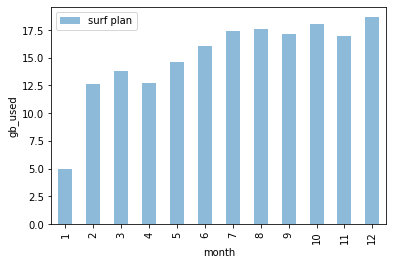

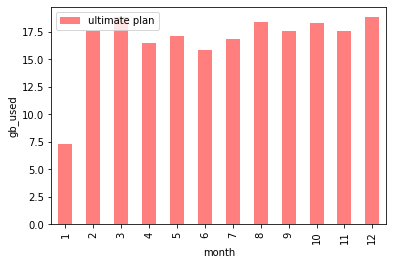

In [98]:
internet_surf_piv['mean'].plot(kind = 'bar', alpha = 0.5).set_ylabel('gb_used');
plt.legend(['surf plan'])
internet_ult_piv['mean'].plot(kind = 'bar', alpha = 0.5, color = 'red').set_ylabel('gb_used');
plt.legend(['ultimate plan']);

array([[<AxesSubplot:title={'center':'rounded_gb_used'}>]], dtype=object)

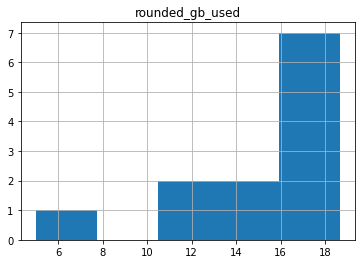

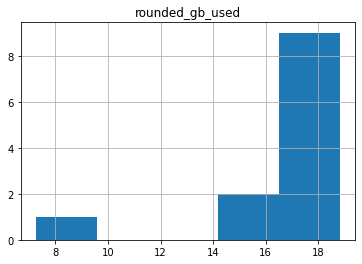

In [99]:
internet_surf_piv['mean'].hist(bins = 5)
internet_ult_piv['mean'].hist(bins = 5)

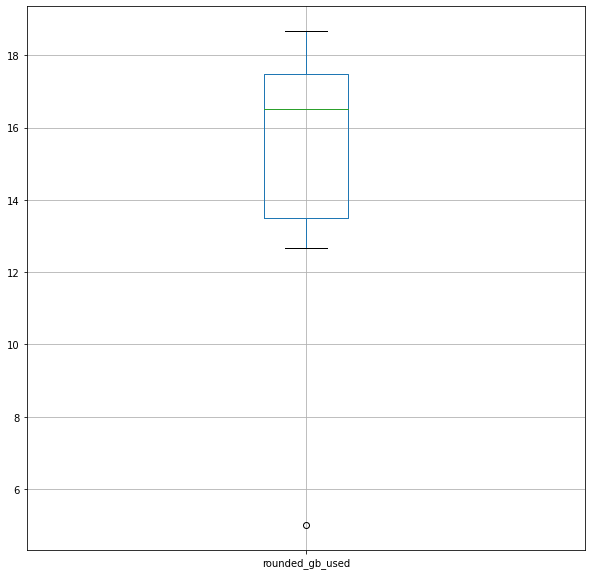

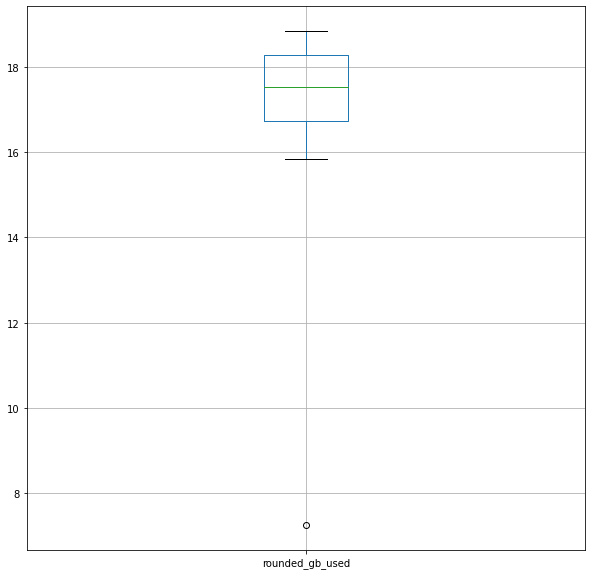

In [100]:
internet_surf_piv['mean'].boxplot(figsize = (10,10));
plt.show()
internet_ult_piv['mean'].boxplot(figsize = (10,10));
plt.show()

In [101]:
results_internet = st.ttest_ind(internet_surf_piv['mean'], internet_ult_piv['mean'])

alpha = 0.05

print('p-value:', results_internet.pvalue)

if results_internet.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.25752992]
We can't reject the null hypothesis


Based on the t-test between the two samples, there is no significant difference between the amount of data used between users of the surf plan and users of the ultimate plan.

## Revenue

In [102]:
merged_data

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.00,0.0,0.00,70.0
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.00,20.0
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.00,20.0
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.00,20.0
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.00,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,11,NaN,81.0,632.0,156.0,surf,3.18,0.0,3.96,20.0
2289,1470,12,NaN,78.0,592.0,153.0,surf,3.09,0.0,2.76,20.0
2290,1484,11,NaN,2.0,38.0,1.0,surf,0.00,0.0,0.00,20.0
2291,1491,4,NaN,8.0,44.0,6.0,surf,0.00,0.0,0.00,20.0


In [103]:
merged_data['total_cost'] = merged_data['mess_cost'] + merged_data['data_cost'] + merged_data['minutes_cost'] + merged_data['plan_cost']
merged_data.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.00,0.0,0.0,70.0,70.00
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.0,20.0,20.00
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.0,20.0,20.00
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.0,20.0,96.49
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.0,20.0,56.40


In [104]:
surf = merged_data.query('plan == "surf"')
surf.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.0,20.0,20.00
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.0,20.0,20.00
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.0,20.0,96.49
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.0,20.0,56.40
5,1001,12,20.0,56.0,412.0,44.0,surf,0.00,46.4,0.0,20.0,66.40


In [105]:
surf_piv = surf.pivot_table(index= 'month', values= 'total_cost', aggfunc= ['mean', 'var'])
surf_piv

,mean,var
,total_cost,total_cost
month,,
1,20.000000,0.000000
2,36.130000,452.729100
3,46.393478,1586.396160
4,40.886600,1261.710251
5,48.599610,2097.372385
6,49.408247,2027.315608
7,63.877355,3069.613571
8,64.874383,3710.766647


In [106]:
ult = merged_data.query('plan == "ultimate"')
ult.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.0,0.00,0.0,70.0,70.00
19,1006,11,3.0,2.0,10.0,15.0,ultimate,0.0,0.00,0.0,70.0,70.00
20,1006,12,33.0,9.0,59.0,139.0,ultimate,0.0,15.96,0.0,70.0,85.96
26,1008,10,18.0,71.0,476.0,21.0,ultimate,0.0,0.00,0.0,70.0,70.00
27,1008,11,24.0,63.0,446.0,37.0,ultimate,0.0,0.00,0.0,70.0,70.00


In [107]:
ult_piv = ult.pivot_table(index= 'month', values= 'total_cost', aggfunc= ['mean', 'var'])
ult_piv

,mean,var
,total_cost,total_cost
month,,
1,70.000000,0.000000
2,70.000000,0.000000
3,74.573333,160.510933
4,73.186667,131.919573
5,70.617931,8.838924
6,71.572766,65.387486
7,71.964746,111.913274
8,73.024789,165.517228


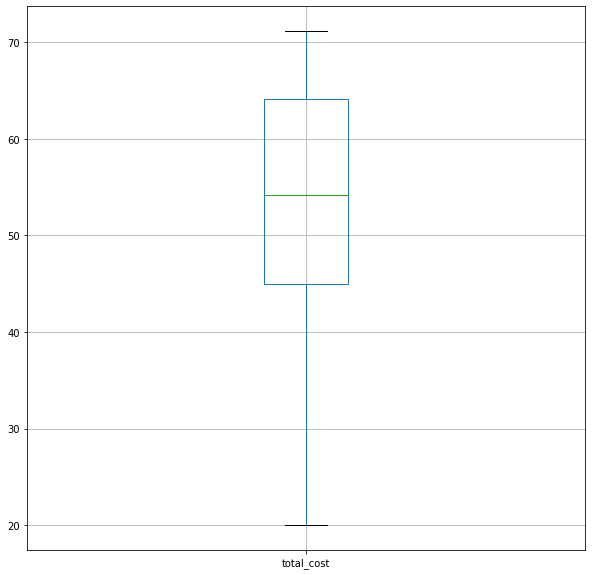

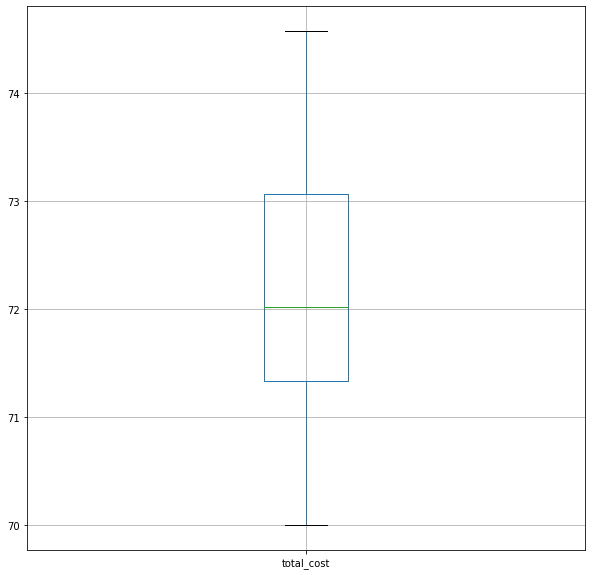

In [108]:
surf_piv['mean'].boxplot(figsize = (10,10));
plt.show()
ult_piv['mean'].boxplot(figsize = (10,10));
plt.show()

In [109]:
results_cost = st.ttest_ind(surf_piv['mean'], ult_piv['mean'])

alpha = 0.05

print('p-value:', results_cost.pvalue)

if results_cost.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.00012514]
We reject the null hypothesis


The revenue per month between users of the Surf plan and the Ultimate plan appears to be differ significantly based on a 95% confidence interval. Revenue from the Ultimate plan is significantly higher.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Great that you added both plans on one graph and applied subplots to show 2 graphs in one row. 
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

Null hypothesis: There is no difference between the average revenue from users of the Surf and Ultimate calling plans.

Alternative hypothesis: There is a difference between the average revenue from users of the Surf and Ultimate calling plans.

As from above:

In [110]:
# Test the hypotheses

results_cost = st.ttest_ind(surf_piv['mean'], ult_piv['mean'])

alpha = 0.05

print('p-value:', results_cost.pvalue)

if results_cost.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.00012514]
We reject the null hypothesis


The revenue per month between users of the Surf plan and the Ultimate plan appears to be differ significantly based on a 95% confidence interval. Revenue from the Ultimate plan is significantly higher.

City differences:

Null hypothesis: There is no difference between the average revenue between users from the NY-NJ area and users from other cities.

Alternative hypothesis: There is a significant difference between the average revenue between users from the NY-NJ area and users from other cities.

In [111]:
# Test the hypotheses
# NY-NJ vs. other cities
merged_data_cities = merged_data.merge(df_users[['user_id','city']], on = 'user_id')
merged_data_cities.head()


,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost,city
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.00,0.0,0.0,70.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.0,20.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.0,20.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.0,20.0,96.49,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.0,20.0,56.40,"Seattle-Tacoma-Bellevue, WA MSA"


In [112]:
ny_nj_data = merged_data_cities[merged_data_cities['city'].str.contains('NY-NJ')]
ny_nj_data.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost,city
56,1014,11,2.0,28.0,163.0,9.0,surf,0.00,0.0,0.00,20.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
57,1014,12,8.0,150.0,1114.0,64.0,surf,0.42,0.0,18.42,20.0,38.84,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,5,5.0,39.0,302.0,NaN,surf,0.00,0.0,0.00,20.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,6,24.0,76.0,490.0,NaN,surf,0.00,86.4,0.00,20.0,106.40,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1022,7,10.0,70.0,475.0,NaN,surf,0.00,0.0,0.00,20.0,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [113]:
other_cities_data = merged_data_cities[~merged_data_cities['city'].str.contains('NY-NJ')]
other_cities_data.head()

,user_id,month,rounded_gb_used,calls_count,minutes_sum,messages,plan,mess_cost,data_cost,minutes_cost,plan_cost,total_cost,city
0,1000,12,2.0,16.0,124.0,11.0,ultimate,0.00,0.0,0.0,70.0,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,7.0,27.0,182.0,30.0,surf,0.00,0.0,0.0,20.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,14.0,49.0,315.0,44.0,surf,0.00,0.0,0.0,20.0,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,23.0,65.0,393.0,53.0,surf,0.09,76.4,0.0,20.0,96.49,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,19.0,64.0,426.0,36.0,surf,0.00,36.4,0.0,20.0,56.40,"Seattle-Tacoma-Bellevue, WA MSA"


In [114]:
ny_nj_data = ny_nj_data[['user_id', 'month', 'total_cost']]
ny_nj_data_piv = ny_nj_data.pivot_table(index= 'month', values= 'total_cost', aggfunc= ['mean', 'var'])
ny_nj_data_piv

,mean,var
,total_cost,total_cost
month,,
2,43.200000,1076.480000
3,41.006667,754.707467
4,40.547857,955.390187
5,48.942778,1119.937809
6,46.245600,1366.319517
7,53.576970,1246.302878
8,60.031707,1790.122215
9,61.901277,1813.110516


In [115]:
other_cities_data = other_cities_data[['user_id', 'month', 'total_cost']]
other_cities_data_piv = other_cities_data.pivot_table(index= 'month', values= 'total_cost', aggfunc= ['mean', 'var'])
other_cities_data_piv

,mean,var
,total_cost,total_cost
month,,
1,53.333333,666.666667
2,52.055000,532.703273
3,59.168621,1339.822112
4,52.869825,1174.368359
5,55.785455,1725.541565
6,58.826723,1501.031176
7,69.435646,2265.610380
8,68.922448,2816.876605


In [116]:
results_cities = st.ttest_ind(ny_nj_data_piv['mean'], other_cities_data_piv['mean'])

alpha = 0.05

print('p-value:', results_cities.pvalue)

if results_cities.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: [0.0803475]
We can't reject the null hypothesis


There is no significant difference between the average revenue of users from the NY-NJ area and users from other cities.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job! Hypotheses have been formulated and tested correctly. 
- Your conclusions based on the results are also correct. 
- You can also additionally compare the variances using Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## General conclusion


The data that was analyzed in this study contained a wide breadth of useful information. Datasets containing plan information, user-specific information, as well as call, message, and internet usage, were evaluated. Most of the raw data arrived in the proper forms. Some enrichment was done by changing dates to datetime forms, which was useful in order to evaluate data on a monthly basis. Additionally, internet usage was rounded up to the nearest gb on a monthly basis, and call duration was rouned up the nearest minute, per Megaline policy.

After initial evaluation of the data and the respective enrichment, the data was aggregated into a dataframe containing all the useful information for further analysis. This dataframe contained average call duration, average messages sent, average internet usage, and total revenue per user on a monthly basis. City information was added later to evaluate differences between the NY-NJ area and the rest of the cities.

Several plots and statistical tests were done comparing the average call duration, the average messages sent, and the average amount of internet used. No significant statistical difference was found between users of the surf plan and the ultimate plan for these parameters. Additionally, no significant difference was found between the revenue of users from the NY-NJ area and users from other areas. However, a significant statistical difference was found in the revenue parameter between the two plans. The revenue from users of the ultimate plan was found to be significantly higher than users of the surf plan. 

Overall, aggregating and analyzing the data based on the different plans led to useful insights. Although some parameters did not have a significant difference, the threshold was not too far off. Most importantly, it led to the insight that the ultimate plan indeed results in higher revenue from this dataset. 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.